In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "E://PDuCV//chest_xray//train"
test_dir = "E://PDuCV//chest_xray//test"
val_dir = "E://PDuCV//chest_xray//val"

In [3]:
data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, 
                             zoom_range = 0.15,
                             rotation_range = 7,
                             width_shift_range=0.15,  
                             height_shift_range=0.1,  
                             horizontal_flip=True)

In [4]:
train_gen = data_gen.flow_from_directory(train_dir,
                                           target_size = (300, 300),
                                           batch_size = 32,
                                           shuffle = True,
                                           color_mode = 'grayscale',
                                            class_mode = 'binary')

Found 4016 images belonging to 2 classes.


In [5]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
val_test_gen = ImageDataGenerator(rescale = 1./255)

val_gen = val_test_gen.flow_from_directory(val_dir,
                                      target_size = (300, 300),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'grayscale',
                                      class_mode = 'binary')

test_gen = val_test_gen.flow_from_directory(test_dir,
                                      target_size = (300, 300),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'grayscale',
                                      class_mode = 'binary')

Found 1016 images belonging to 2 classes.
Found 824 images belonging to 2 classes.


Normal X-Rays


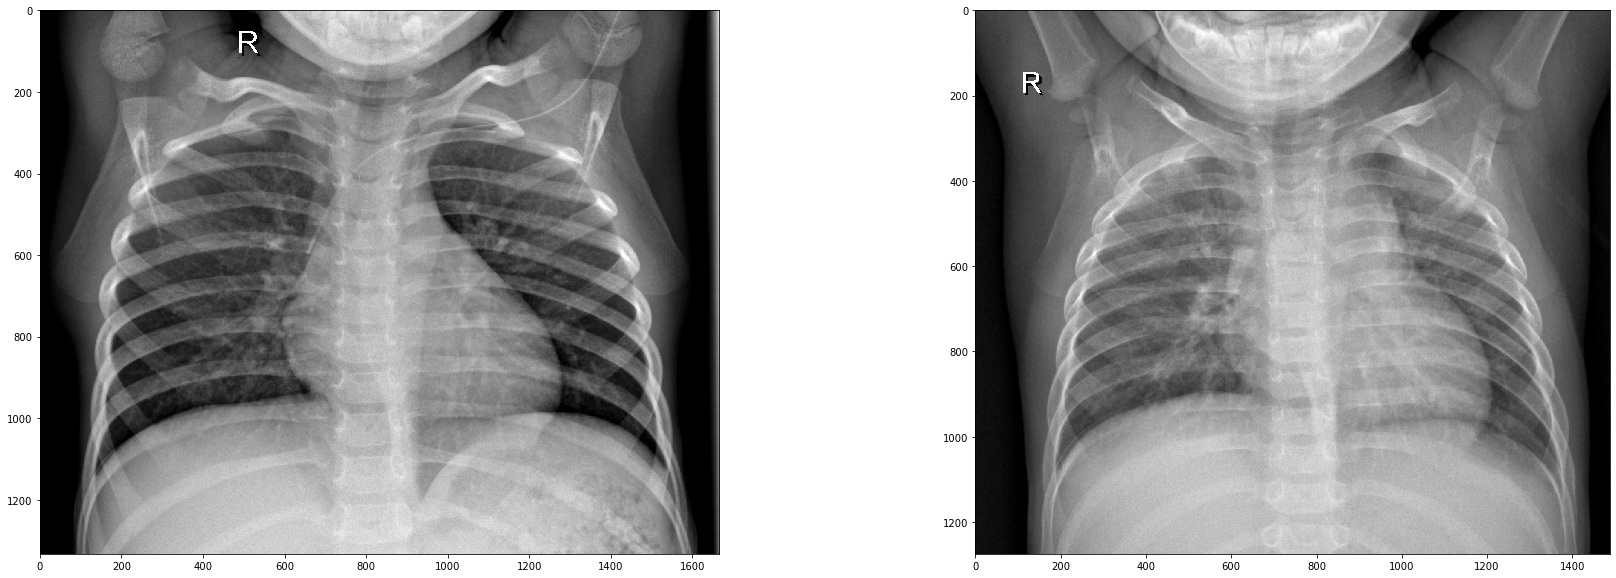

In [7]:
ig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 10))
normal1 = load_img(train_dir + '//NORMAL//IM-0394-0001.jpeg')
normal2 = load_img(train_dir + "//NORMAL//IM-0395-0001.jpeg")
ax1.imshow(normal1)
ax2.imshow(normal2)
print("Normal X-Rays")
plt.show()

Infected X-Rays


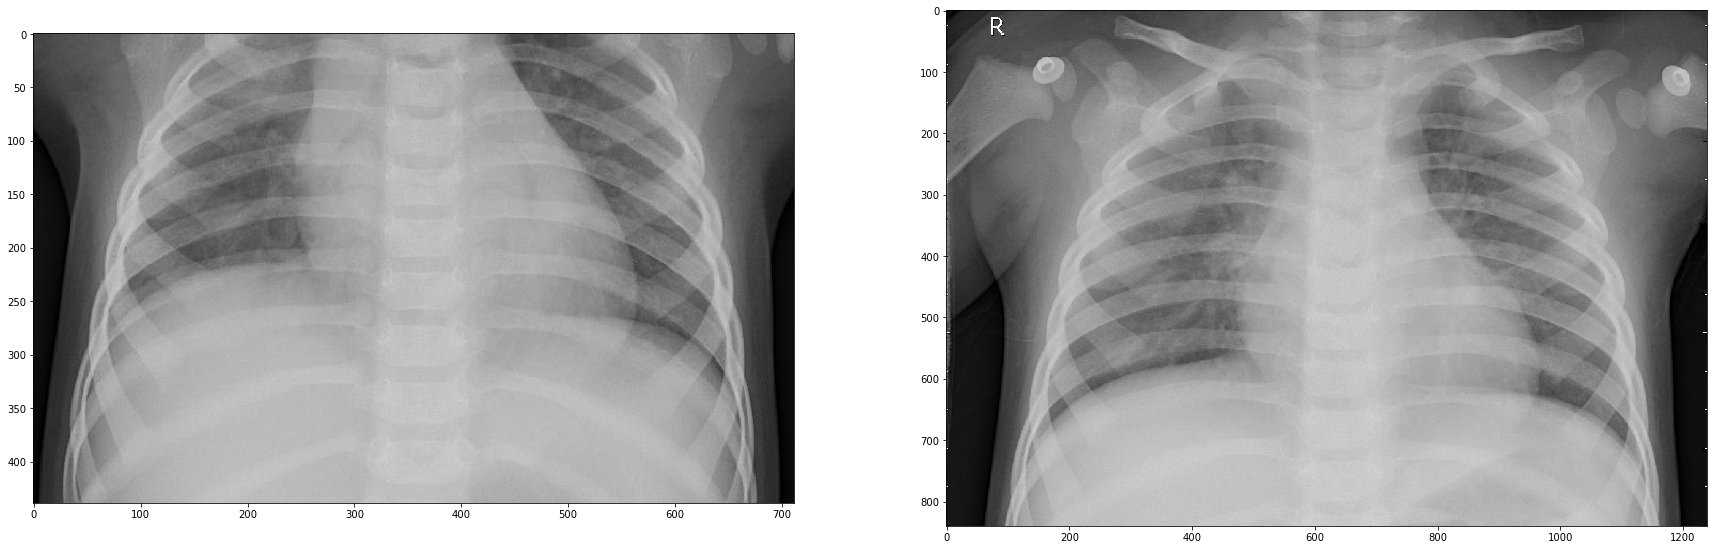

In [8]:
ig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 10))
infected1 = load_img(train_dir + '//PNEUMONIA//person1_bacteria_1.jpeg')
infected2 = load_img(train_dir + "//PNEUMONIA//person1_bacteria_2.jpeg")
ax1.imshow(infected1)
ax2.imshow(infected2)
print("Infected X-Rays")
plt.show()

In [9]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[300, 300, 1]))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 256)       2

In [11]:
stop = EarlyStopping(patience = 10, monitor = 'val_loss')

In [12]:
model.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = False, callbacks=[stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 126 steps, validate for 32 steps
Epoch 1/100
126/126 [==============================] - 80s 635ms/step - loss: 0.5319 - accuracy: 0.7418 - val_loss: 0.4311 - val_accuracy: 0.8061
Epoch 2/100
126/126 [==============================] - 85s 677ms/step - loss: 0.2943 - accuracy: 0.8810 - val_loss: 0.4060 - val_accuracy: 0.8150
Epoch 3/100
126/126 [==============================] - 99s 784ms/step - loss: 0.2592 - accuracy: 0.8927 - val_loss: 0.2164 - val_accuracy: 0.9203
Epoch 4/100
126/126 [==============================] - 102s 813ms/step - loss: 0.2161 - accuracy: 0.9116 - val_loss: 0.2143 - val_accuracy: 0.9173
Epoch 5/100
126/126 [==============================] - 86s 685ms/step - loss: 0.1824 - accuracy: 0.9295 - val_loss: 0.1996 - val_accuracy: 0.9144
Epoch 6/100
126/126 [==============================] - 87s 694ms/step - loss: 0.1764 - accuracy: 0.9370 - val_loss: 0.1500 - val_accuracy: 0.9439
Epoch 7/100
126/126 [=========

In [13]:
history = pd.DataFrame(model.history.history)

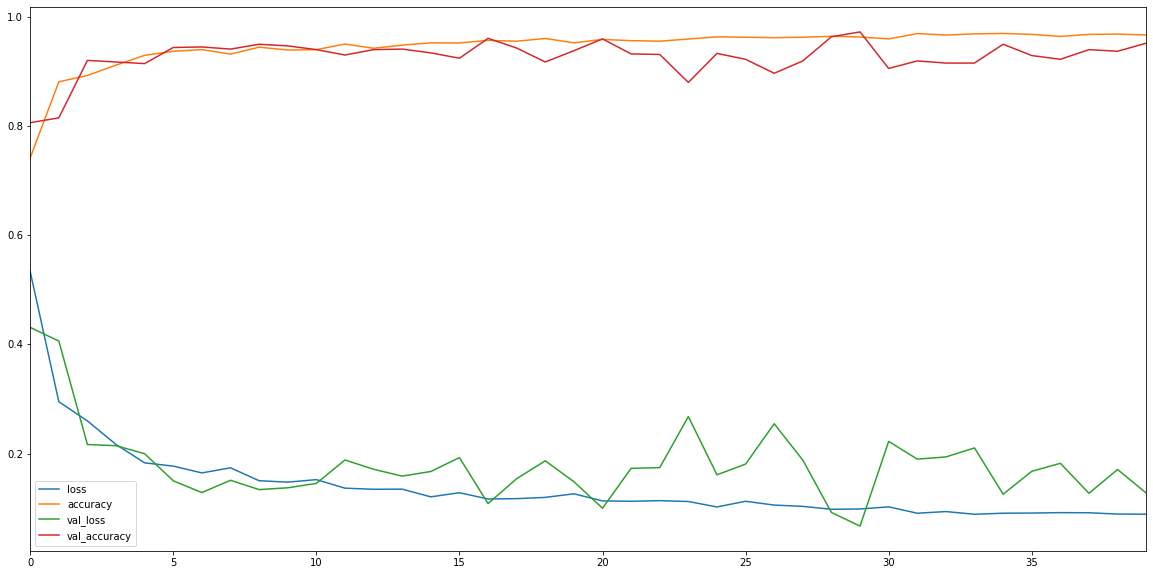

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
history.plot()

In [15]:
print("Testing accuracy : ",model.evaluate(test_gen)[1]*100)

  ...
    to  
  ['...']
26/26 [==============================] - 8s 310ms/step - loss: 0.2650 - accuracy: 0.9199
Testing accuracy :  91.99029207229614


In [18]:
predictions_test = (model.predict(test_gen,verbose=True) > 0.5).astype("int32")

26/26 [==============================] - 6s 220ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       234
           1       0.92      0.97      0.95       590

    accuracy                           0.92       824
   macro avg       0.92      0.88      0.90       824
weighted avg       0.92      0.92      0.92       824



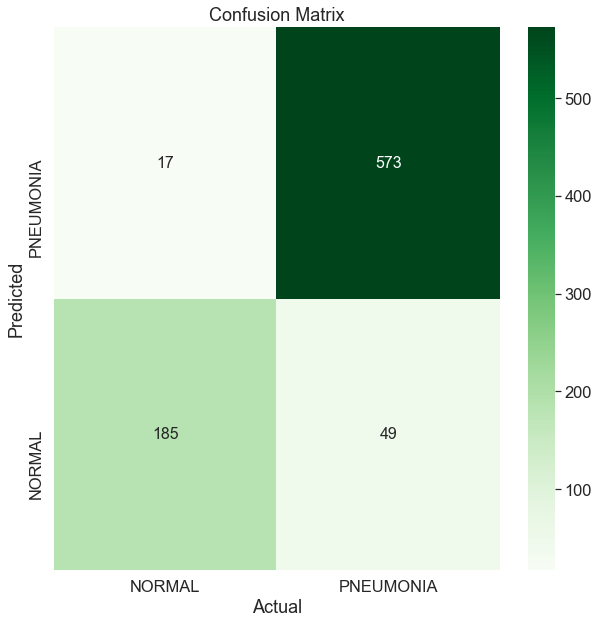

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = np.array([0] * 234 + [1] * 590) #234 Normal, #590 Pneumonia
data = confusion_matrix(y_true, predictions_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']);
ax.set_ylim([0,2])

print("Classification Report: ")
print(classification_report(y_true,predictions_test))

In [25]:
model.save('first_model.h5')